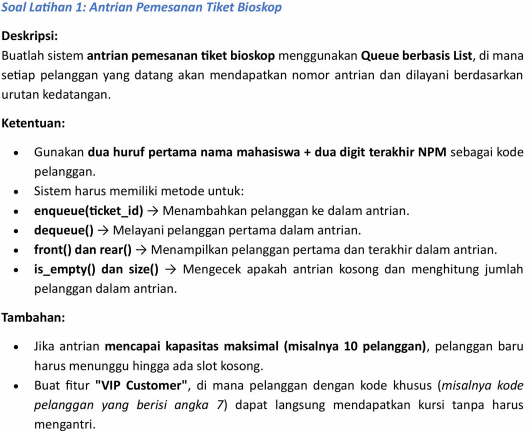

In [ ]:
# Variabel
ticket_queue = None

# Class
class Customer:
  def __init__(self, id, queue_number):
    self.id = id
    self.queue_number = queue_number

  def __repr__(self):
    return f"ID\t\t: {self.id}\nNomor Antrian\t: {self.queue_number}"

class Queue:
  def __init__(self, max_length, special_code = None):
    self.queue = []
    self.current_number = 0
    self.max_length = max_length
    self.special_code = special_code
    self.commands = {
        "enqueue": self.enqueue,
        "dequeue": self.dequeue,
        "front": self.front,
        "rear": self.rear,
        "is_empty": self.is_empty,
        "show": self.show,
        "size": self.size
    }

  def __iter__(self):
    for v in self.queue:
      yield v

  def enqueue(self, new_data):
    if len(self.queue) >= self.max_length:
      print("Antrian penuh!")
      return

    splitted = new_data.split(" ")

    if len(splitted) == 0:
      return

    if len(splitted) >= 2 and isinstance(splitted[1], str) and self.special_code != "" and splitted[1] == self.special_code:
      print(f"Tiket VIP dengan id {splitted[0]} menggunakan kode khusus {self.special_code}.\nTiket akan langsung diproses.")
    else:
      self.current_number = self.current_number + 1
      new_customer = Customer(splitted[0], self.current_number)
      self.queue.append(new_customer)
      print(f"Tiket dengan id {splitted[0]} ditambahkan ke dalam antrian dengan nomor urut {self.current_number}.")

  def dequeue(self):
    if len(self.queue) == 0:
      print("Antrian kosong, tidak dapat memproses tiket.")
      return
    print(f"Memproses tiket:\n{self.queue.pop(0)}")

  def front(self):
    if len(self.queue) == 0:
      print("Antrian kosong.")
      return
    print(self.queue[0])

  def rear(self):
    if len(self.queue) == 0:
      print("Antrian kosong.")
      return
    print(self.queue[-1])

  def is_empty(self):
    if len(self.queue) == 0:
      print("Antrian kosong.")
    else:
      print(f"Antrian tidak kosong.")

  def show(self):
    if len(self.queue) == 0:
      print("Antrian kosong.")
      return

    print("Isi Antrian:\n")

    for v in self:
      print(f"{'=' * 25}\n{v}\n{'=' * 25}\n")

  def size(self):
    length = len(self.queue)
    if length == 0:
      print("Antrian kosong.")
    else:
      print(f"Antrian terisi dengan {length} tiket.")

  def execute(self, command):
    splitted = command.split(" ")

    if len(splitted) == 0:
      print("Input tidak valid.")
      return

    try:
      command_to_execute = self.commands[splitted[0]]

      if not command_to_execute:
        return

      if len(splitted) > 1:
        splitted.pop(0)
        command_to_execute(" ".join(splitted))
      else:
        command_to_execute()
    except Exception as exception:
      print(f"Error: {exception}")


while True:
  try:
    ticket_queue = Queue(
      int(input("Masukkan jumlah kapasitas maksimal\t\t: ")),
      input("Masukkan kode khusus yang dapat digunakan\t: ")
      )
    break
  except:
    print("Kesalahan input.\n")


print("""
Daftar perintah:
\033[92menqueue\033[0m \033[96m<id tiket>\033[0m \033[96m<kode khusus (opsional)>\033[0m - Tambahkan tiket baru ke dalam antrian
\033[92mdequeue\033[0m - Proses antrian tiket pertama
\033[92mfront\033[0m - Lihat tiket pertama pada antrian
\033[92mrear\033[0m - Lihat tiket terakhir pada antrian
\033[92mshow\033[0m - Lihat isi antrian tiket
\033[92msize\033[0m - Lihat jumlah antrian tiket
""")


while True:
  user_input = input()

  if user_input == "stop":
    break

  ticket_queue.execute(user_input)
  print("")

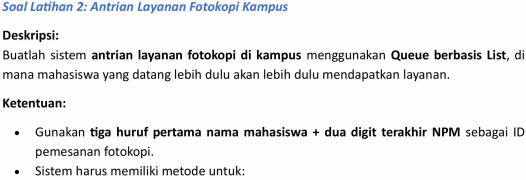

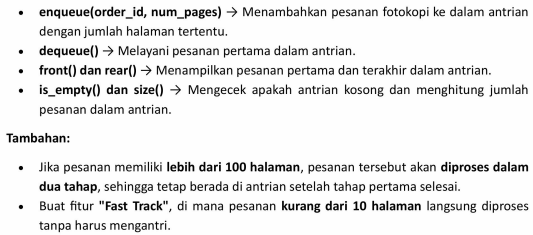

In [ ]:
# Class
class Paper:
  def __init__(self, id, page_count, queue_number):
    self.id = id
    self.page_count = page_count
    self.processes_count = 2 if page_count > 100 else 1
    self.processes_left = self.processes_count
    self.queue_number = queue_number

  def __repr__(self):
    return f"ID\t\t\t: {self.id}\nJumlah Halaman\t\t: {self.page_count}\nNomor Antrian\t\t: {self.queue_number}\nTahap Pemrosesan\t: {self.processes_count - self.processes_left} dari {self.processes_count}"

class Queue:
  def __init__(self):
    self.queue = []
    self.current_number = 0
    self.commands = {
        "enqueue": self.enqueue,
        "dequeue": self.dequeue,
        "front": self.front,
        "rear": self.rear,
        "is_empty": self.is_empty,
        "show": self.show,
        "size": self.size
    }

  def __iter__(self):
    for v in self.queue:
      yield v

  def enqueue(self, new_data):
    splitted = new_data.split(" ")

    if len(splitted) < 2 or not splitted[1].isnumeric():
      print("Input tidak valid.")
      return

    page_count = int(splitted[1])
    self.current_number = self.current_number + 1

    if page_count < 10:
      print(f"Pesanan dengan id {splitted[0]} memiliki {splitted[1]} halaman.\nPesanan akan langsung diproses tanpa mengantri dengan program \"Fast Track\".")
    else:
      new_paper = Paper(splitted[0], page_count, self.current_number)
      self.queue.append(new_paper)
      print(f"Pesanan dengan id {splitted[0]} ({page_count} halaman) ditambahkan ke dalam antrian dengan nomor urut {self.current_number}.")

  def dequeue(self):
    if len(self.queue) == 0:
      print("Antrian kosong, tidak dapat memproses pesanan.")
      return

    first_order = self.queue[0]
    first_order.processes_left -= 1

    if first_order.processes_left > 0:
      print(f"Memproses pesanan:\n{first_order}")
    else:
      print(f"Memproses pesanan:\n{self.queue.pop(0)}")

  def front(self):
    if len(self.queue) == 0:
      print("Antrian kosong.")
      return
    print(self.queue[0])

  def rear(self):
    if len(self.queue) == 0:
      print("Antrian kosong.")
      return
    print(self.queue[-1])

  def is_empty(self):
    if len(self.queue) == 0:
      print("Antrian kosong.")
    else:
      print(f"Antrian tidak kosong.")

  def show(self):
    if len(self.queue) == 0:
      print("Antrian kosong.")
      return

    print("Isi Antrian:\n")

    for v in self:
      print(f"{'=' * 34}\n{v}\n{'=' * 34}\n")

  def size(self):
    length = len(self.queue)
    if length == 0:
      print("Antrian kosong.")
    else:
      print(f"Antrian terisi dengan {length} pesanan.")

  def execute(self, command):
    splitted = command.split(" ")

    if len(splitted) == 0:
      return

    try:
      command_to_execute = self.commands[splitted[0]]

      if not command_to_execute:
        return

      if len(splitted) > 1:
        splitted.pop(0)
        command_to_execute(" ".join(splitted))
      else:
        command_to_execute()
    except Exception as exception:
      print(f"Error: {exception}")


# Program utama
photocopy_queue = Queue()


print("""Daftar perintah:
\033[92menqueue\033[0m \033[96m<id pesanan>\033[0m \033[96m<jumlah halaman>\033[0m - Tambahkan pesanan baru ke dalam antrian
\033[92mdequeue\033[0m - Proses pesanan pertama
\033[92mfront\033[0m - Lihat pesanan pertama pada antrian
\033[92mrear\033[0m - Lihat pesanan terakhir pada antrian
\033[92mshow\033[0m - Lihat isi antrian pesanan
\033[92msize\033[0m - Lihat jumlah antrian pesanan
""")


while True:
  user_input = input()

  if user_input == "stop":
    break

  photocopy_queue.execute(user_input)
  print("")

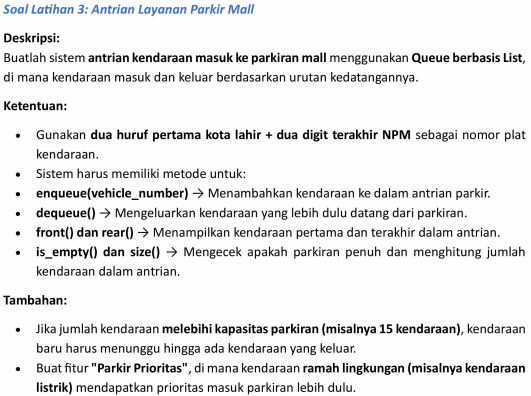

In [ ]:
# Variabel
parking_queue = None
priority_ids = {
    "1": "Kendaraan Listrik",
    "2": "Kendaraan VIP"
}

# Class
class Vehicle:
  def __init__(self, license_plate, queue_number, priority_id = "-"):
    global priority_ids
    self.license_plate = license_plate
    self.priority_id = priority_id if priority_ids.get(priority_id) else "-"
    self.queue_number = queue_number

  def __repr__(self):
    priority_name = f" ({priority_ids.get(self.priority_id)})" if priority_ids.get(self.priority_id) else ""
    return f"Plat Nomor\t: {self.license_plate}\nTipe Prioritas\t: {self.priority_id}{priority_name}\nNomor Antrian\t: {self.queue_number}"

class Queue:
  def __init__(self, max_capacity):
    self.queue = []
    self.current_number = 0
    self.max_capacity = max_capacity
    self.commands = {
        "enqueue": self.enqueue,
        "dequeue": self.dequeue,
        "front": self.front,
        "rear": self.rear,
        "is_empty": self.is_empty,
        "show": self.show,
        "size": self.size
    }

  def __iter__(self):
    for v in self.queue:
      yield v

  def enqueue(self, new_data):
    if len(self.queue) >= self.max_capacity:
      print("Parkiran penuh!")
      return

    splitted = new_data.split(" ")

    if len(splitted) == 0:
      print("Input tidak valid.")
      return

    global priority_ids
    self.current_number = self.current_number + 1

    if len(splitted) == 2 and isinstance(splitted[1], str) and priority_ids.get(splitted[1]) is not None:
      new_vehicle = Vehicle(splitted[0], self.current_number, splitted[1])
      self.queue.insert(0, new_vehicle)
      print(f"Kendaraan dengan plat nomor {splitted[0]} (ID prioritas: {splitted[1]}, {priority_ids[splitted[1]]}) dan nomor antrian {self.current_number} ditempatkan pada awal antrian.")
    else:
      new_vehicle = Vehicle(splitted[0], self.current_number)
      self.queue.append(new_vehicle)
      print(f"Kendaraan dengan plat nomor {splitted[0]} ditambahkan ke dalam antrian dengan nomor antrian {self.current_number}.")

  def dequeue(self):
    if len(self.queue) == 0:
      print("Parkiran kosong.")
      return

    print(f"Kendaraan dengan plat nomor {self.queue[0].license_plate} dikeluarkan dari parkiran.")
    self.queue.pop(0)

  def front(self):
    if len(self.queue) == 0:
      print("Parkiran kosong.")
      return
    print(self.queue[0])

  def rear(self):
    if len(self.queue) == 0:
      print("Parkiran kosong.")
      return
    print(self.queue[-1])

  def is_empty(self):
    if len(self.queue) == 0:
      print("Parkiran kosong.")
    else:
      print(f"Parkiran tidak kosong.")

  def show(self):
    if len(self.queue) == 0:
      print("Parkiran kosong.")
      return

    print("Isi Parkiran:\n")

    for v in self:
      print(f"{'=' * 40}\n{v}\n{'=' * 40}\n")

  def size(self):
    length = len(self.queue)
    if length == 0:
      print("Parkiran kosong.")
    else:
      print(f"Parkiran terisi dengan {length} kendaraan.")

  def execute(self, command):
    splitted = command.split(" ")

    if len(splitted) == 0:
      return

    try:
      command_to_execute = self.commands[splitted[0]]

      if not command_to_execute:
        return

      if len(splitted) > 1:
        splitted.pop(0)
        command_to_execute(" ".join(splitted))
      else:
        command_to_execute()
    except Exception as exception:
      print(f"Error: {exception}")


# Program utama
while True:
  try:
    parking_queue = Queue(int(input("Masukkan jumlah kapasitas maksimal\t: ")))
    break
  except:
    print("Kesalahan input.\n")


print("""
Daftar perintah:
\033[92menqueue\033[0m \033[96m<id kendaraan>\033[0m \033[96m<id prioritas (opsional)>\033[0m - Tambahkan kendaraan baru ke dalam antrian parkir
\033[92mdequeue\033[0m - Keluarkan kendaraan pertama dari parkiran
\033[92mfront\033[0m - Lihat kendaraan pertama pada antrian dalam parkiran
\033[92mrear\033[0m - Lihat kendaraan terakhir pada antrian dalam parkiran
\033[92mshow\033[0m - Lihat isi antrian kendaraan dalam parkiran
\033[92msize\033[0m - Lihat jumlah antrian kendaraan dalam parkiran
""")


while True:
  user_input = input()

  if user_input == "stop":
    break

  parking_queue.execute(user_input)
  print("")

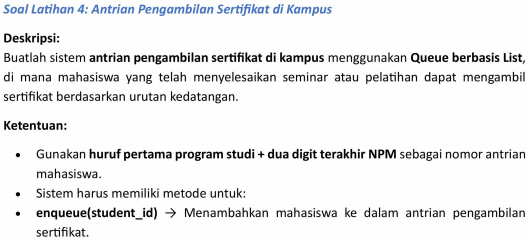

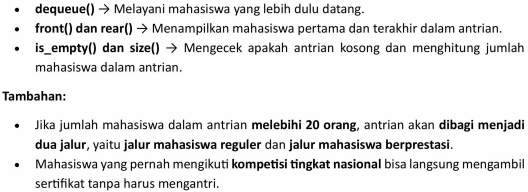

In [ ]:
# Class
class Student:
  def __init__(self, npm, queue_number):
    self.npm = npm
    self.queue_number = queue_number

  def __repr__(self):
    return f"NPM\t\t: {self.npm}\nNomor Antrian\t: {self.queue_number}"

class Queue:
  def __init__(self):
    self.regular_queue = []
    self.special_queue = []
    self.current_number = 0
    self.queues = {
        "reguler": self.regular_queue,
        "prestasi": self.special_queue
    }
    self.commands = {
        "enqueue": self.enqueue,
        "dequeue": self.dequeue,
        "front": self.front,
        "rear": self.rear,
        "is_empty": self.is_empty,
        "show": self.show,
        "size": self.size
    }

  def __iter__(self):
    for v in self.regular_queue:
      yield v

  def enqueue(self, command):
    splitted = command.split(" ")

    # Perintah minimal harus berisi jalur dan NPM
    if len(splitted) < 2:
      print("Input tidak valid.")
      return
    elif len(splitted) == 3 and splitted[2].lower() == "y":
      print(f"Mahasiswa dengan NPM {splitted[1]} bisa langsung mengambil sertifikat tanpa harus mengantri.")
      return

    target_queue = splitted[0]

    if self.queues.get(target_queue) is None:
      print("Jalur tidak ditemukan.")
      return

    if len(self.regular_queue) < 20:
      target_queue = "reguler"

    self.current_number = self.current_number + 1
    new_student = Student(splitted[1], self.current_number)
    self.queues[target_queue].append(new_student)
    print(f"Mahasiswa dengan NPM {splitted[1]} ditambahkan ke dalam antrian jalur {target_queue} dengan nomor urut {self.current_number}.")

  def dequeue(self, queue_name):
    if self.queues.get(queue_name) is None:
      print("Input tidak valid.")
      return

    target_queue = self.queues[queue_name]

    if len(target_queue) == 0:
      print(f"Antrian jalur {queue_name} kosong.")
      return
    print(f"Memproses antrian jalur {queue_name}:\n{target_queue.pop(0)}")

  def front(self):
    for queue_name, current_queue in self.queues.items():
      if len(current_queue) == 0:
        print(f"Antrian {queue_name} kosong.")
      else:
        print(f"Antrian terakhir pada jalur {queue_name}:\n{current_queue[0]}")
      print("")

  def rear(self):
    for queue_name, current_queue in self.queues.items():
      if len(current_queue) == 0:
        print(f"Antrian {queue_name} kosong.")
      else:
        print(f"Antrian terakhir pada jalur {queue_name}:\n{current_queue[-1]}")
      print("")

  def is_empty(self):
    for queue_name, current_queue in self.queues.items():
      if len(current_queue) == 0:
        print(f"Antrian {queue_name} kosong.")
      else:
        print(f"Antrian {queue_name} tidak kosong.")

  def show(self):
    for queue_name, current_queue in self.queues.items():
      if len(current_queue) == 0:
        print(f"Antrian {queue_name} kosong.")
        continue

      print(f"Isi Antrian {queue_name}:\n")

      for v in current_queue:
        print(f"{'=' * 25}\n{v}\n{'=' * 25}\n")

  def size(self):
    for queue_name, current_queue in self.queues.items():
      length = len(current_queue)
      if length == 0:
        print(f"Antrian {queue_name} kosong.")
      else:
        print(f"Antrian {queue_name} terisi dengan {length} mahasiswa.")

  def execute(self, command):
    splitted = command.split(" ")

    if len(splitted) == 0:
      print("Input tidak valid.")
      return

    try:
      command_to_execute = self.commands[splitted[0]]

      if not command_to_execute:
        return

      if len(splitted) > 1:
        splitted.pop(0)
        command_to_execute(" ".join(splitted))
      else:
        command_to_execute()
    except Exception as exception:
      print(f"Error: {exception}")


# Program utama
queue = Queue()


print("""Daftar perintah:
\033[92menqueue reguler\033[0m \033[96m<NPM>\033[0m - Tambahkan mahasiswa jalur reguler ke dalam antrian
\033[92menqueue prestasi\033[0m \033[96m<NPM>\033[0m \033[96m<pernah mengikuti kompetisi nasional (Y/N) (opsional)>\033[0m - Tambahkan mahasiswa jalur berprestasi ke dalam antrian
\033[92mdequeue reguler\033[0m - Layani mahasiswa jalur reguler yang lebih dulu datang
\033[92mdequeue prestasi\033[0m - Layani mahasiswa jalur berprestasi yang lebih dulu datang
\033[92mfront\033[0m - Lihat mahasiswa pertama pada antrian
\033[92mrear\033[0m - Lihat mahasiswa terakhir pada antrian
\033[92mshow\033[0m - Lihat isi antrian mahasiswa
\033[92msize\033[0m - Lihat jumlah mahasiswa dalam antrian
""")


while True:
  user_input = input()

  if user_input == "stop":
    break

  queue.execute(user_input)
  print("")